In [ ]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('C:\\Users\\JAHNAVI\\Desktop\\ML\\A4'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [8]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


In [9]:
data=pd.read_csv('C:\\Users\\JAHNAVI\\Desktop\\ML\\A4\\spambase_csv.csv')

In [10]:
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [11]:
x=1
for col in data.columns:
    print(f'columns {x} is:',col)
    x+=1

columns 1 is: word_freq_make
columns 2 is: word_freq_address
columns 3 is: word_freq_all
columns 4 is: word_freq_3d
columns 5 is: word_freq_our
columns 6 is: word_freq_over
columns 7 is: word_freq_remove
columns 8 is: word_freq_internet
columns 9 is: word_freq_order
columns 10 is: word_freq_mail
columns 11 is: word_freq_receive
columns 12 is: word_freq_will
columns 13 is: word_freq_people
columns 14 is: word_freq_report
columns 15 is: word_freq_addresses
columns 16 is: word_freq_free
columns 17 is: word_freq_business
columns 18 is: word_freq_email
columns 19 is: word_freq_you
columns 20 is: word_freq_credit
columns 21 is: word_freq_your
columns 22 is: word_freq_font
columns 23 is: word_freq_000
columns 24 is: word_freq_money
columns 25 is: word_freq_hp
columns 26 is: word_freq_hpl
columns 27 is: word_freq_george
columns 28 is: word_freq_650
columns 29 is: word_freq_lab
columns 30 is: word_freq_labs
columns 31 is: word_freq_telnet
columns 32 is: word_freq_857
columns 33 is: word_freq_da

In [12]:
data.corr()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
word_freq_make,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,...,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165,0.126208
word_freq_address,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,...,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680,-0.030224
word_freq_all,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,...,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114,0.196988
word_freq_3d,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,...,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369,0.057371
word_freq_our,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,...,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
word_freq_over,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,...,-0.019119,-0.008705,-0.015133,0.065043,0.105692,0.019894,-0.010278,0.090172,0.082089,0.232604
word_freq_remove,0.007669,0.003918,0.036677,0.019784,0.147336,0.061163,1.000000,0.044545,0.050786,0.056809,...,-0.033089,-0.051885,-0.027653,0.053706,0.070127,0.046612,0.041565,0.059677,-0.008344,0.332117
word_freq_internet,-0.003950,-0.016280,0.012003,0.010268,0.029598,0.079561,0.044545,1.000000,0.105302,0.083129,...,-0.027432,-0.032494,-0.019548,0.031454,0.057910,-0.008012,0.011254,0.037575,0.040252,0.206808
word_freq_order,0.106263,-0.003826,0.093786,-0.002454,0.020823,0.117438,0.050786,0.105302,1.000000,0.130624,...,-0.014646,-0.031003,0.013601,0.043639,0.149365,-0.000522,0.111308,0.189247,0.248724,0.231551
word_freq_mail,0.041198,0.032962,0.032075,-0.004947,0.034495,0.013897,0.056809,0.083129,0.130624,1.000000,...,0.011945,0.003936,0.007357,0.036737,0.075786,0.044830,0.073677,0.103308,0.087273,0.138962


<Axes: >

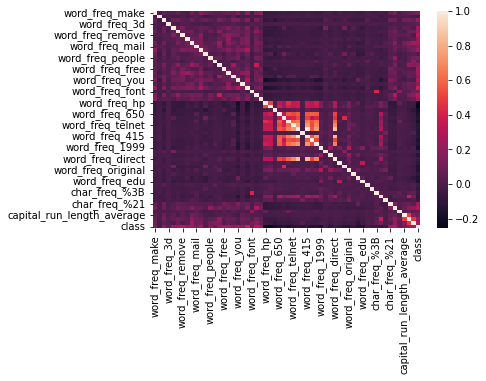

In [13]:
sns.heatmap(data.corr())

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [15]:
data.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [16]:
data.duplicated().sum()

391

In [17]:
from sklearn import svm
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [18]:
model = svm.SVC(kernel='linear')
model.fit(X, y)

SVC(kernel='linear')

In [19]:
predictions = model.predict(X)
 
# Evaluate the predictions
accuracy = model.score(X, y)
print("Accuracy of SVM:", accuracy)

Accuracy of SVM: 0.9345794392523364


In [21]:
 
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [22]:
from sklearn.model_selection import train_test_split
import numpy as np


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:

# Import the necessary modules and libraries
# Scale the features using standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
 
# Create a kernel support vector machine model
ksvm = svm.SVC(kernel='rbf',
               gamma=0.1,
               C=10.0)
 
# Train the model on the training data
ksvm.fit(X_train, y_train)
 
# Evaluate the model on the test data
accuracy = ksvm.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9001085776330076


In [27]:
   
from sklearn.svm import SVC
classifier = SVC(kernel ='sigmoid')
classifier.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [28]:
accuracy = classifier.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.8762214983713354


In [29]:
   
from sklearn.svm import SVC
classifier = SVC(kernel ='poly', degree = 4)
classifier.fit(X_train, y_train) 

SVC(degree=4, kernel='poly')

In [30]:
accuracy = classifier.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.7220412595005429
